# Preamble

In [10]:
import os
os.chdir("/home/imendoza/deblend/galaxy-net")
import sys
sys.path.insert(0, "/home/imendoza/deblend/galaxy-net")
sys.path.insert(0, "/home/imendoza/deblend/galaxy-net/WeakLensingDeblending")
sys.path.insert(0, "/home/imendoza/deblend/galaxy-net/BlendingToolKit")

from WeakLensingDeblending import descwl
from importlib import reload
from BlendingToolKit import btk
import draw_catsim
import numpy as np 
import galsim
import matplotlib.pyplot as plt
from astropy.table import Column, Table
import astropy
import datasets

reload(descwl)
reload(descwl.render)
reload(draw_catsim)

<module 'draw_catsim' from '/home/imendoza/deblend/galaxy-net/draw_catsim.py'>

# Prepare

In [11]:
#setup
survey_name = 'LSST'
bands = ['y', 'z', 'i', 'r', 'g', 'u']
catalog_name = "/home/imendoza/deblend/galaxy-net/params/OneDegSq.fits"
table = astropy.table.Table.read(catalog_name)

In [13]:
#get and display params. 
params = draw_catsim.get_default_params()
params

{'survey_name': 'LSST',
 'catalog_name': '/home/imendoza/deblend/galaxy-net/params/OneDegSq.fits',
 'bands': ['y', 'z', 'i', 'r', 'g', 'u']}

## Filter

In [110]:
obs = draw_galaxies.create_obs(params)
sizes = get_size(table, 0.2, obs[2])
table.add_column(sizes)

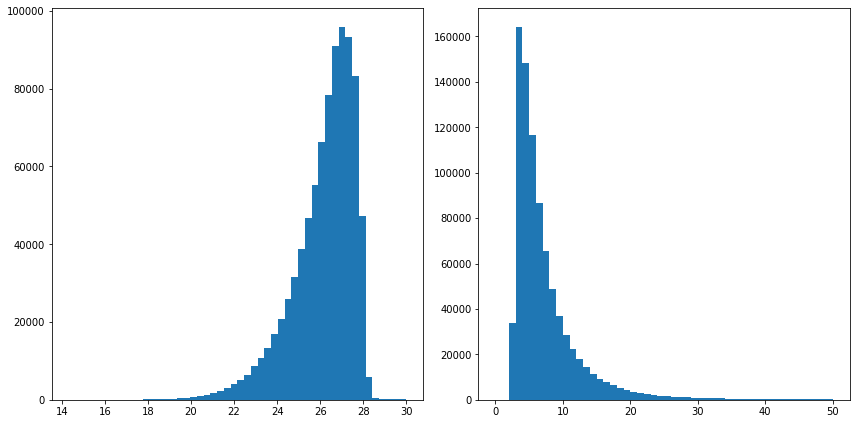

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1,ax2 = axes.flatten()
ax1.hist(table['i_ab'], bins=50);
ax2.hist(table['size'], bins=50, range=(0,50));
plt.tight_layout()

In [115]:
cond = (table['i_ab'] < 25.3) & (table['size'] > 15)
ftable = table[cond] #default cut that Sowmya uses. 
len(ftable)

27667

## Can we draw an entry without a PSF ? 

0.0


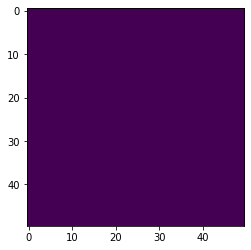

In [8]:
obs = draw_galaxies.create_obs(params)
single_obs = obs[2]
band = params['bands'][2]
entry = np.array(np.random.choice(ftable), dtype=ftable.dtype)
galaxy_builder = descwl.model.GalaxyBuilder(
    single_obs, no_disk=False, no_bulge=False,
    no_agn=False, verbose_model=False)
galaxy = galaxy_builder.from_catalog(entry,
                                     entry['ra'],
                                     entry['dec'],
                                     band)

galaxy.model.drawImage(image=single_obs.image, method='phot').array
plt.imshow(single_obs.image.array)
print(single_obs.image.array.sum())

# Final drawing procedure

In [90]:
reload(descwl)
reload(descwl.render)
reload(draw_catsim)

<module 'draw_catsim' from '/home/imendoza/deblend/galaxy-net/draw_catsim.py'>

In [ ]:
ftable

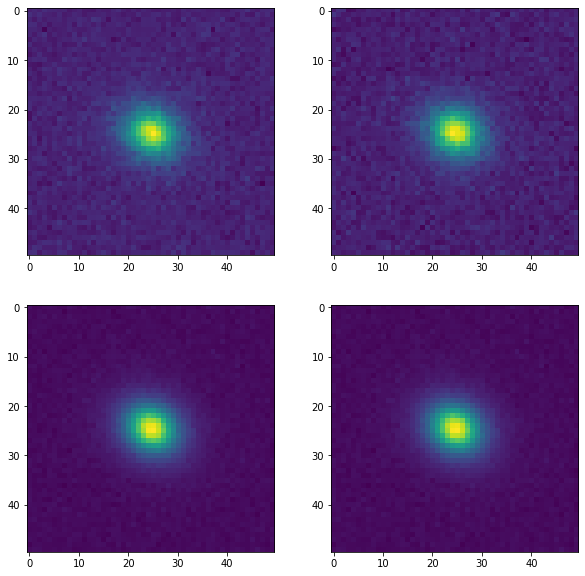

In [131]:
#drawing in the i-band. 
fig, axes = plt.subplots(2,2,figsize=(10,10))
ax1,ax2, ax3, ax4 = axes.flatten()
obs = draw_galaxies.create_obs(params)
entry = np.array(np.random.choice(ftable), dtype=ftable.dtype)

image1 = draw_galaxies.single_band(entry, params['bands'][2], obs[2], params, no_psf=False, draw_method='auto' )
image2 = draw_galaxies.single_band(entry, params['bands'][2], obs[2], params, no_psf=False, draw_method='auto', 
                                   snr=200)

image3 = draw_galaxies.single_band(entry, params['bands'][2], obs[2], params, no_psf=False, draw_method='phot' )
image4 = draw_galaxies.single_band(entry, params['bands'][2], obs[2], params, no_psf=True, draw_method='phot' )

ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)
ax4.imshow(image3)


# Dataset sampling

In [356]:
reload(draw_catsim);
reload(datasets);

In [357]:
ds = datasets.CatsimGalaxies(snr=200, add_noise=True, stamp_size=10, verbose=False)
vars(ds.renderer)
# single_obs = ds.renderer.get_obs()[2]
# plt.imshow(ds.renderer.single_band(ds.cat[10], single_obs, 'i'))

{'survey_name': 'LSST',
 'bands': ['y', 'z', 'i', 'r', 'g', 'u'],
 'stamp_size': 10,
 'pixel_scale': 0.2,
 'image_size': 50,
 'snr': 200,
 'min_snr': 0.05,
 'truncate_radius': 30,
 'no_psf': None,
 'add_noise': True,
 'galsim_draw_method': 'auto',
 'preserve_flux': True,
 'verbose': False}

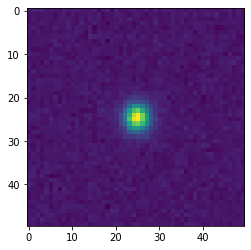

In [408]:
plt.imshow(ds[np.random.choice(np.arange(len(ds)))]['image'][2])

In [355]:
ds[np.random.choice(np.arange(len(ds)))][2] - 

array([[  511.,   734., -1573., ...,  1329.,   931., -2051.],
       [  650.,    18.,  -395., ..., -1343.,  -797.,   340.],
       [ 1111., -1096., -1582., ...,  2823.,   439.,    87.],
       ...,
       [ -221., -1650., -1111., ..., -1059.,  -538.,  -704.],
       [ -128., -1528., -1164., ..., -1265., -1724.,    62.],
       [  -40.,  -789.,   668., ...,  -725.,  -931.,   372.]])

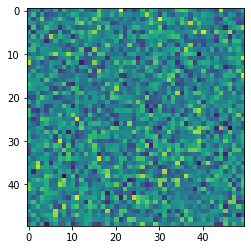

In [89]:

plt.imshow(ds[10][3])

# Backup

In [22]:
param = btk.config.Simulation_params(catalog_name, max_number=1, batch_size=5)
catalog = btk.get_input_catalog.load_catalog(param)
param.display()


Configurations:
add_noise                      True
bands                          ('u', 'g', 'r', 'i', 'z', 'y')
batch_size                     5
catalog_name                   /home/imendoza/deblend/galaxy-net/params/OneDegSq.fits
max_number                     1
min_snr                        0.05
pixel_scale                    0.2
seed                           0
stamp_size                     24
survey_name                    LSST
verbose                        False




In [9]:
# obtain a survey object in each of the bands.
for band in bands:

    # dictionary of default values.
    survey_dict = descwl.survey.Survey.get_defaults(
        survey_name=survey_name, filter_band=band)

    descwl_survey = descwl.survey.Survey(no_analysis=True,
                                         survey_name=survey_name,
                                         filter_band=band, **survey_dict)
    obs_generator.append(descwl_survey)


In [10]:
# galaxy renderer to draw an individual galaxy
survey1 = obs_generator[0]
survey1.args

{'survey_name': 'LSST',
 'filter_band': 'y',
 'atmospheric_psf_beta': 0.0,
 'atmospheric_psf_e1': 0.0,
 'atmospheric_psf_e2': 0.0,
 'cosmic_shear_g1': 0.0,
 'cosmic_shear_g2': 0.0,
 'airmass': 1.2,
 'mirror_diameter': 8.36,
 'effective_area': 32.4,
 'image_width': 4096,
 'image_height': 4096,
 'pixel_scale': 0.2,
 'exposure_time': 5520.0,
 'sky_brightness': 21.2,
 'zenith_psf_fwhm': 0.7,
 'zero_point': 43.7,
 'extinction': 0.1}

In [11]:
iso_render_engine = descwl.render.Engine(
        survey=survey1,
        min_snr=0.05,
        truncate_radius=30,
        no_margin=False,
        verbose_render=False)